# Image Processing
When the device points some part of sky, the altitude and azimuth is calculated using gyroscope, accelerometer, and magnetometer sensors. 
Using astropy library, the coordinates of altitude and azimuth is transformed into RA Dec coordinates. Local-datetime, latitude, and longitude is required for this transformation. Local-datetime is obtained from the system and latitude and longitude is obtained either from GPS-module or inputed manually. 
With the obtained RA Dec coordinates, we query the database of astronomical catalogue to get the nearby astronomical objects (like stars, galaxies, nebulas, planets, etc.)

Furthermore, we get a picture of the same patch of sky. We process the image and separate the objects above certain threshold of brightness. Afterwards, we cross reference the obtained result with apparent brightness of objects in sky and we predict which objects are present in the picture. The code is as shown below: 

(in this code, a random picture obtained from Internet is used and the cross-referencing is done with a dummy array)


In [1]:
# import the necessary packages
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt


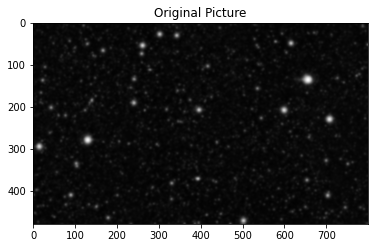

In [2]:
#sample image
image = cv2.imread("studyofdista.jpeg")
original = image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blurred, cmap='gray')
plt.title('Original Picture')
plt.show()

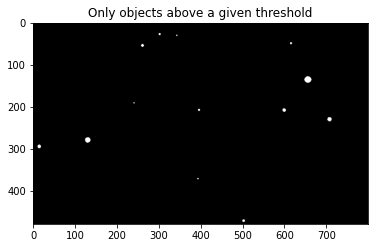

In [3]:
thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='gray')
plt.title('Only objects above a given threshold')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

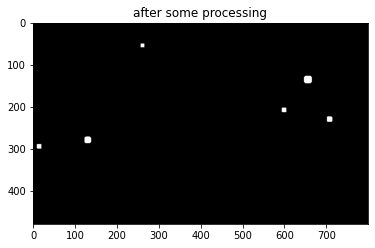

In [4]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)
plt.imshow(thresh, cmap='gray')
plt.title('after some processing')
plt.show


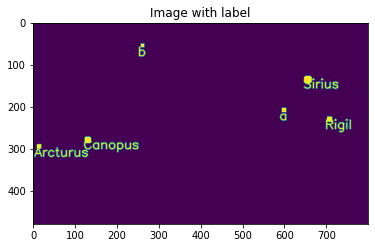

In [5]:

image = thresh
original_image= image

edges= cv2.Canny(image, 50,200)

contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)

#this is a dummy array
#during integration, this array will be replaced with the obtained results from database of astronomical catalouge
stars=['Sirius', 'Canopus', 'Rigil', 'Arcturus', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']


for (i,c) in enumerate(sorted_contours):
    M= cv2.moments(c)
    cx= int(M['m10']/M['m00'])
    cy= int(M['m01']/M['m00'])
    x,y,w,h= cv2.boundingRect(c)
    cv2.putText(image, text= stars[i], org=(cx-10,y+30),
            fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,255,255),
            thickness=2, lineType=cv2.LINE_AA)

    

plt.imshow(image)
plt.title('Image with label')
plt.show()


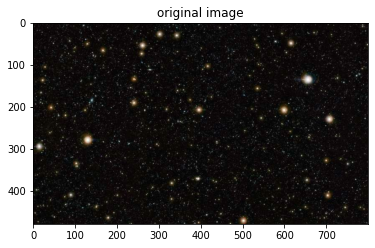

In [12]:
plt.imshow(original)
plt.title('original image')
plt.show()

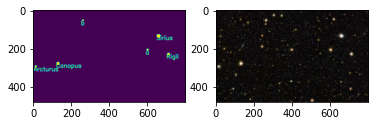

In [10]:
# f, axarr = plt.subplots(1,2)
# axarr[0].imshow(image)
# axarr[1].imshow(original)